# Test of ScTransformPy on zebrafish data

Import the package and silence some warning information (mostly `is_categorical_dtype` warning from anndata)

In [1]:
import warnings

warnings.filterwarnings("ignore")

import dynamo as dyn
from dynamo.configuration import DKM
import numpy as np
import SCTransform

this is like R's sessionInfo() which helps you to debug version related bugs if any. 

## Load data 

Dynamo comes with a few builtin sample datasets so you can familiarize with dynamo before analyzing your own dataset.
You can read your own data via `read`, `read_loom`, `read_h5ad`, `read_h5` (powered by the [anndata](https://anndata.readthedocs.io/en/latest/anndata.AnnData.html) package) or load_NASC_seq, etc. Here I just load the zebrafish sample data that comes with dynamo. This dataset has 4181 cells and 16940 genes. Its `.obs` attribute also included `condition`, `batch` information from the original study (you should also store those information to your `.obs` attribute which is essentially a Pandas Dataframe, see more at [anndata](https://anndata.readthedocs.io/en/latest/)). `Cluster`, `Cell_type`, umap coordinates that was originally analyzed with [Monocle 3](https://cole-trapnell-lab.github.io/monocle3/) are also provided. 

In [2]:
adata = dyn.sample_data.zebrafish()


|-----> Downloading data to ./data/zebrafish.h5ad


In [3]:
SCTransform.SCTransform(adata)

In [4]:
adata

AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'umi_sct', 'log_umi_sct', 'gene_sct', 'log_gene_sct', 'umi_per_gene_sct', 'log_umi_per_gene_sct'
    var: 'Intercept_sct', 'log_umi_sct', 'theta_sct', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'genes_step1_sct', 'log10_gmean_sct'
    layers: 'spliced', 'unspliced'

In [5]:
# preprocessor = dyn.pp.Preprocessor()
# preprocessor.preprocess_adata(adata)
# print(adata)


In [6]:
print(adata)

AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'umi_sct', 'log_umi_sct', 'gene_sct', 'log_gene_sct', 'umi_per_gene_sct', 'log_umi_per_gene_sct'
    var: 'Intercept_sct', 'log_umi_sct', 'theta_sct', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'genes_step1_sct', 'log10_gmean_sct'
    layers: 'spliced', 'unspliced'


|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [54.7515s]


<Figure size 600x400 with 0 Axes>

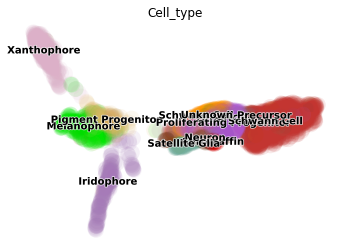

In [7]:
dyn.tl.reduceDimension(adata, basis="umap", n_components=50)


<Figure size 1500x1500 with 0 Axes>

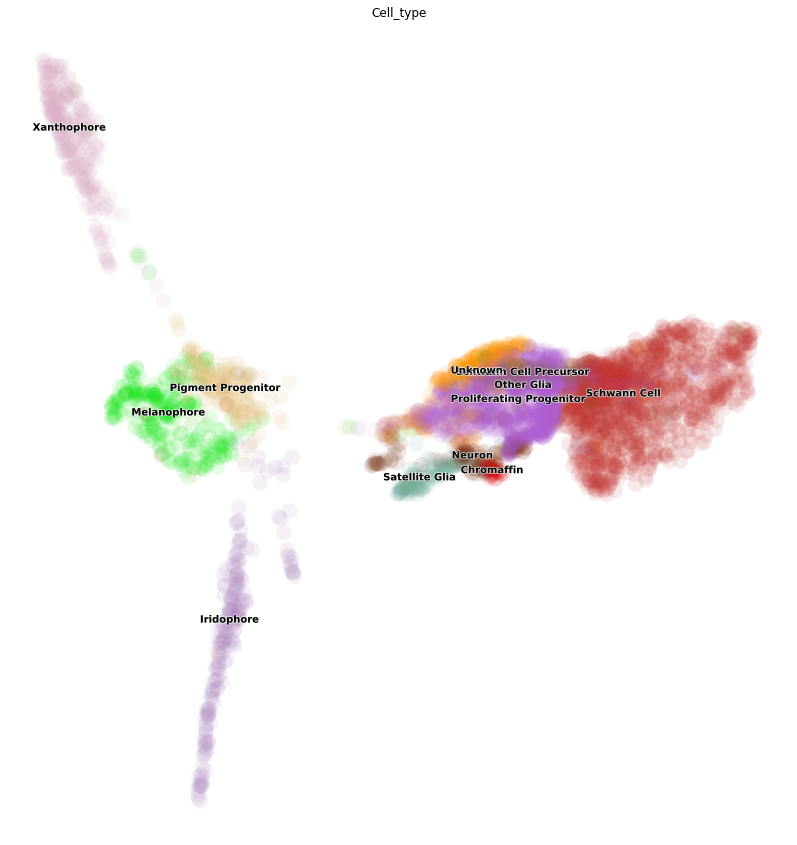

In [22]:

dyn.pl.umap(adata, color="Cell_type", figsize = (15, 15))

In [8]:
adata

AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'umi_sct', 'log_umi_sct', 'gene_sct', 'log_gene_sct', 'umi_per_gene_sct', 'log_umi_per_gene_sct'
    var: 'Intercept_sct', 'log_umi_sct', 'theta_sct', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'genes_step1_sct', 'log10_gmean_sct'
    uns: 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_valid_ind', 'neighbors', 'umap_fit', 'Cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [9]:
print(adata.uns["explained_variance_ratio_"])
print(adata.uns["explained_variance_ratio_"].sum())

[0.01382773 0.01157531 0.01055605 0.00705273 0.00678082 0.00570071
 0.0038612  0.00320963 0.00291646 0.00236563 0.00226932 0.00206748
 0.00191934 0.00184263 0.0017648  0.00163564 0.00156718 0.00146064
 0.00139158 0.00132462 0.00129006 0.00123786 0.00122273 0.00119894
 0.00112389 0.00107926 0.00105247 0.00102516 0.00100877]
0.095328644


In [24]:
adata

AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'umi_sct', 'log_umi_sct', 'gene_sct', 'log_gene_sct', 'umi_per_gene_sct', 'log_umi_per_gene_sct'
    var: 'Intercept_sct', 'log_umi_sct', 'theta_sct', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'genes_step1_sct', 'log10_gmean_sct'
    uns: 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_valid_ind', 'neighbors', 'umap_fit', 'Cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [25]:
q_key = 'PCs'
adata.uns[q_key].shape
pca_transformed_data = adata.obsm["X_pca"]
Q = adata.uns[q_key]
projected_data = dyn.vectorfield.utils.vector_transformation(pca_transformed_data, Q) + adata.uns["pca_mean"]
print("projected data:", projected_data.shape)
print("shape of original data:", adata[:, adata.uns["pca_valid_ind"]].X.shape)


projected data: (4181, 14667)
shape of original data: (4181, 14667)


In [27]:
import sklearn
X_dense = adata[:, adata.uns["pca_valid_ind"]].X.toarray()
loss = sklearn.metrics.mean_squared_error(X_dense, projected_data)
print(loss)


0.67727333


<AxesSubplot:>

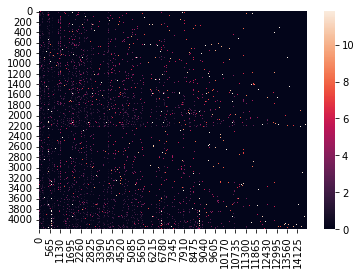

In [28]:
import seaborn as sns
sns.heatmap(X_dense)

<AxesSubplot:>

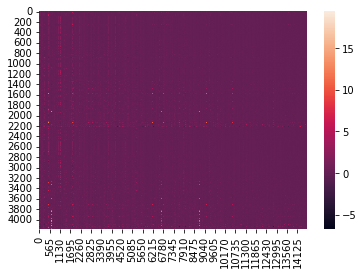

In [29]:
sns.heatmap(projected_data)

<AxesSubplot:>

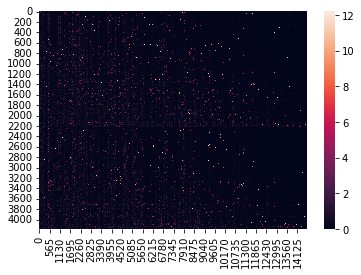

In [30]:
sns.heatmap(np.abs(projected_data - X_dense))

In [18]:
print(adata.X - adata.layers["spliced"])

  (0, 1346)	5.879989147186279
  (0, 1345)	3.5191874504089355
  (0, 1344)	8.16785717010498
  (0, 1343)	10.805365562438965
  (0, 1342)	10.805365562438965
  (0, 1341)	8.614176750183105
  (0, 1340)	8.007318496704102
  (0, 1339)	6.82553768157959
  (0, 1338)	6.004323959350586
  (0, 1337)	10.805365562438965
  (0, 1336)	4.881167888641357
  (0, 1335)	10.805365562438965
  (0, 1334)	10.805365562438965
  (0, 1333)	10.805365562438965
  (0, 1332)	10.498090744018555
  (0, 1331)	10.805365562438965
  (0, 1330)	9.663392066955566
  (0, 1319)	10.805365562438965
  (0, 1286)	9.038113594055176
  (0, 1220)	1.789257287979126
  (0, 1122)	10.805365562438965
  (0, 875)	1.6403207778930664
  (0, 787)	5.2253947257995605
  (0, 665)	4.364219665527344
  (0, 404)	1.1219134330749512
  :	:
  (4180, 76)	-0.6869127750396729
  (4180, 75)	-0.5403708815574646
  (4180, 74)	-53.925118774175644
  (4180, 71)	-6.884946167469025
  (4180, 62)	-0.7090862393379211
  (4180, 56)	-47.66011160612106
  (4180, 55)	-4.456547975540161
  (4180,

## Zebrafish tutorial analysis on preprocessed adata